<a href="https://colab.research.google.com/github/lin3372/BK_Graph_Machine_Learning_Pkt21/blob/main/120_Linear_Regression_(Scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Day13-Scikit-learn介紹(5)_ Linear-Regression](https://ithelp.ithome.com.tw/articles/10206114)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## Linear Regression with scikit-learn

線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料
先從簡單的線性回歸舉例，image.png, image.png 稱為斜率, image.png 稱為截距

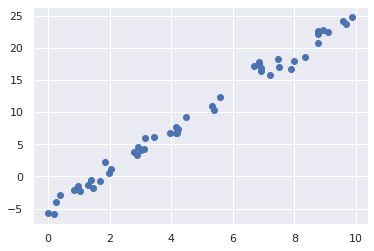

In [23]:
m = 3
x0 = -5
xmax = 10
nPts=50

rng = np.random.RandomState(1)
x = xmax * rng.rand(nPts)
y = m * x + x0 + rng.randn(nPts)
plt.scatter(x, y);

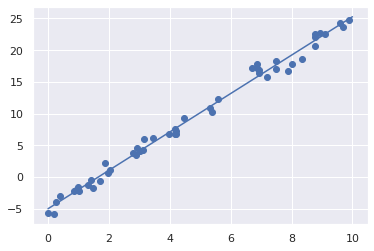

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [25]:
print(f"Model slope: {model.coef_[0]:.3}")
print(f"Model intercept: {model.intercept_:.3}")

Model slope: 3.03
Model intercept: -5.0


## Multidimensional linear models
多維回歸的線性糢型，image.png ，可以在y上建立多維的陣列。

In [26]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -1., 2.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.500000000000016
[ 1.5 -1.   2. ]


## Polynomial basis functions
利用SKlearn中匯入 PolynomialFeatures，來做多項式函數處理

In [27]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

利用make_pipeline，一維陣列轉換為三維陣列，加入線性回歸中

In [28]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

轉換完成後，可以看到(x,y)的關係為正弦 image.png 圖形

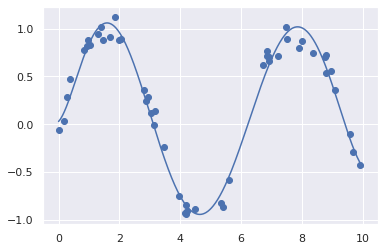

In [33]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);